# Import pandas library and read the file of data
-Make summary of the data throw pandas profilig

In [36]:
import pandas as pd
data = pd.read_csv("march.csv")
from pandas_profiling import ProfileReport
profile = ProfileReport(data , title = " Mashroom report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Import label encoder
- for encode every non numeric attributes to numeric to make learning easier for the model

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
#transform the data into numeric
lbl_encoder = LabelEncoder()
for i in data:
         if data[i].dtypes=="object":
             data[i]= lbl_encoder.fit_transform(data[i]) 
        
print(data.head())

   Class attribute  cap-shape  cap-surface  cap-color  bruises  odor  \
0                1          5            2          4        1     6   
1                0          5            2          9        1     0   
2                0          0            2          8        1     3   
3                1          5            3          8        1     6   
4                0          5            2          3        0     5   

   gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                1             0          1           4  ...   
1                1             0          0           4  ...   
2                1             0          0           5  ...   
3                1             0          1           5  ...   
4                1             1          0           4  ...   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         2                       7                       7   
1                       

# Save the new data into new csv file

In [39]:

data.to_csv("newdata.csv")
data_2 = pd.read_csv("newdata.csv")


# Data preprocessig
-Drop similar colums

In [40]:
data_2=data_2.drop(["veil-type" , "veil-color" , "ring-number" ,"gill-attachment" , "Unnamed: 0"] ,axis = 1)
data_2.head(2)

Class attribute  cap-shape  cap-surface  cap-color  bruises  odor  \
0                1          5            2          4        1     6   
1                0          5            2          9        1     0   

   gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  \
0             0          1           4            0           3   
1             0          0           4            0           2   

   stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  \
0                         2                         2                       7   
1                         2                         2                       7   

   stalk-color-below-ring  ring-type  spore-print-color  population  habitat  
0                       7          4                  2           3        5  
1                       7          4                  3           2        1

-Check the duplicates in the new file of the data after dropping the coulmns 

In [42]:
print(data_2.duplicated().sum())
data_2 = data_2.drop_duplicates()
print(data_2.duplicated().sum()) 

114
0


# Make another profile after cleaning the data

In [43]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data_2 , title = " Mashroom report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# prepare the data for the model
- Spilt data to X and Y
- X is the indenpent variable
- Y is denpentvariable

In [44]:
x = data_2.iloc[ : ,1:]
y = data_2.iloc [ : , 0]
print(y.head())
#print(x.head())

0    1
1    0
2    0
3    1
4    0
Name: Class attribute, dtype: int64


# Define correlation between Each vairable

In [45]:
cor= x.corr()
print(cor)

                          cap-shape  cap-surface  cap-color   bruises  \
cap-shape                  1.000000    -0.050084  -0.050044 -0.041349   
cap-surface               -0.050084     1.000000  -0.017298  0.073909   
cap-color                 -0.050044    -0.017298   1.000000 -0.004412   
bruises                   -0.041349     0.073909  -0.004412  1.000000   
odor                      -0.019579     0.044783  -0.387171 -0.058200   
gill-spacing               0.010524    -0.281332   0.142758 -0.306714   
gill-size                  0.050454     0.211570  -0.173115 -0.380765   
gill-color                -0.001507    -0.167373   0.090370  0.545147   
stalk-shape                0.057619    -0.009851  -0.466388  0.086876   
stalk-root                 0.024018    -0.127320   0.323153  0.238152   
stalk-surface-above-ring  -0.026485     0.090329  -0.061267  0.470113   
stalk-surface-below-ring  -0.029300     0.103411  -0.042731  0.474464   
stalk-color-above-ring    -0.035094     0.072837  -

# Importing laibries that I will use it later

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix ,accuracy_score
from sklearn import metrics

import matplotlib.pyplot as plt
import numpy
from sklearn.metrics import roc_curve

# split the data into training and testing sets

In [47]:
X_train, X_test, y_train, y_test = train_test_split( x , y , test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create a logistic regression classifier

In [48]:
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='newton-cg',C=1.0,random_state = 42 , max_iter= 1000)
# train the classifier on the training data
LogisticRegressionModel.fit(X_train, y_train)
# predict the labels for the test data
y_pred = LogisticRegressionModel.predict(X_test)
#evaluate the accuracy of Logistic regression 
acc = accuracy_score(y_test, y_pred)
print('Accuracy of logregression:', acc )


Accuracy of logregression: 0.9438202247191011


# confusion matrix and roc for LRC

In [49]:
fpr,tpr,thershold =metrics.roc_curve(y_test, y_pred, pos_label=2)
print("con ",confusion_matrix(y_test, y_pred))
print("accuracy score ",accuracy_score(y_test, y_pred))
y_pred = LogisticRegressionModel.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

con  [[1167   67]
 [  68 1101]]
accuracy score  0.9438202247191011
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1234
           1       0.94      0.94      0.94      1169

    accuracy                           0.94      2403
   macro avg       0.94      0.94      0.94      2403
weighted avg       0.94      0.94      0.94      2403



C:\Users\ELmasry\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


# Roc for LRC

No handles with labels found to put in legend.


{'Precision': 0.9426369863013698, 'Sensitivity_recall': 0.941830624465355, 'Specificity': 0.9457050243111832, 'F1_score': 0.9422336328626445}


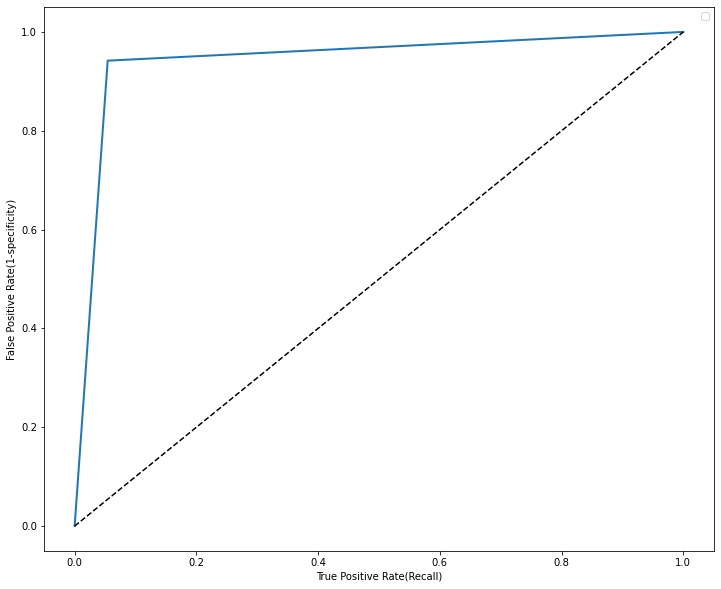

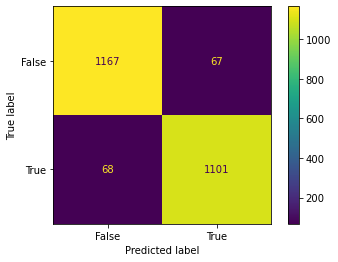

In [50]:

Precision = metrics.precision_score(y_test,y_pred)
Sensitivity_recall = metrics.recall_score(y_test,y_pred)
Specificity = metrics.recall_score(y_test,y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test,y_pred)
print({"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

fpr, tpr, thresholds = roc_curve(y_test,y_pred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal # Add axis labels and grid
    #plt.figure(figsize=figure)
    plt.xlabel('True Positive Rate(Recall)')
    plt.ylabel("False Positive Rate(1-specificity)")
    plt.legend()
    
plot_roc_curve(fpr, tpr)

confusion_matrix = metrics.confusion_matrix(y_test,y_pred )

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# create a support vector machine classifier

In [51]:
from sklearn.svm import SVC
svc_model = SVC(  random_state = 42 , gamma= 0.1 , kernel = 'rbf'  )

#train the classifer 

svc_model.fit(X_train, y_train)

# predict the labels for the test data

svc_predict = svc_model.predict(X_test)

#evaluate the accuracy of SVC

acc_SVC = accuracy_score(y_test, svc_predict)
print("ACCuracy of sup_vec " , acc_SVC )

ACCuracy of sup_vec  1.0


# confusion matrix and roc 

In [52]:
fpr,tpr,thershold =metrics.roc_curve(y_test, svc_predict, pos_label=2)
print("con ",confusion_matrix(y_test, svc_predict))
print("accuracy score ",accuracy_score(y_test, svc_predict))
report = classification_report(y_test, svc_predict)
print(report)

C:\Users\ELmasry\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


TypeError: 'numpy.ndarray' object is not callable

# Roc for SVC

No handles with labels found to put in legend.


{'Precision': 1.0, 'Sensitivity_recall': 1.0, 'Specificity': 1.0, 'F1_score': 1.0}


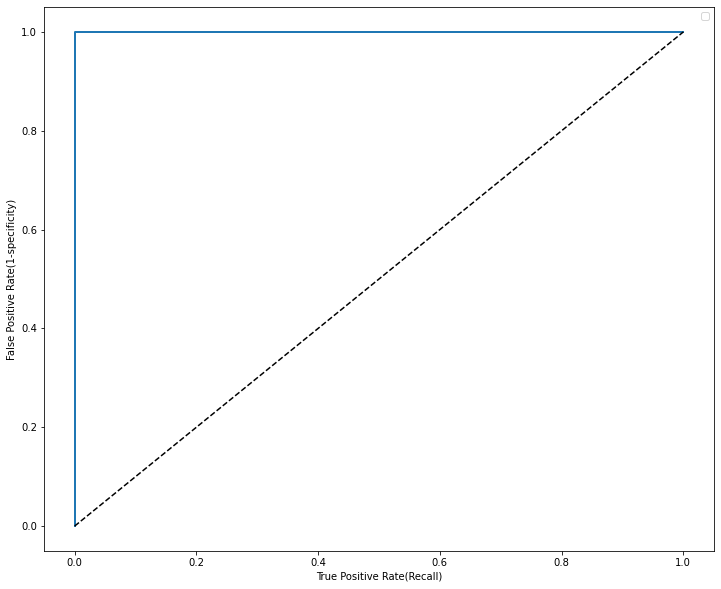

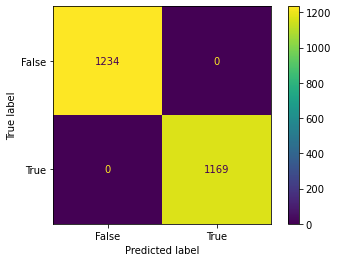

In [32]:

Precision = metrics.precision_score(y_test,svc_predict)
Sensitivity_recall = metrics.recall_score(y_test,svc_predict)
Specificity = metrics.recall_score(y_test,svc_predict, pos_label=0)
F1_score = metrics.f1_score(y_test,svc_predict)
print({"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

fpr, tpr, thresholds = roc_curve(y_test,svc_predict)
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal # Add axis labels and grid
    #plt.figure(figsize=figure)
    plt.xlabel('True Positive Rate(Recall)')
    plt.ylabel("False Positive Rate(1-specificity)")
    plt.legend()
    
plot_roc_curve(fpr, tpr)

confusion_matrix = metrics.confusion_matrix(y_test,svc_predict )

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Import MLPClassifer 
- create the model of MLP classifer

In [57]:
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=42,
                    verbose=False,
                    learning_rate_init=0.1)

# Fit data onto the model
clf.fit(X_train,y_train)

# Make prediction on test dataset
ypred=clf.predict(X_test)

# Calcuate accuracy
accuracy_score(y_test,ypred)

[0 1 0 ... 1 1 0]


0.9854348730753225

# confusion matrix for MLP

In [56]:
fpr,tpr,thershold =metrics.roc_curve(y_test, ypred, pos_label=2)
print("con ",confusion_matrix(y_test, ypred))
print("accuracy score MLp",accuracy_score(y_test, ypred))
report = classification_report(y_test, ypred)
print(report)


C:\Users\ELmasry\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


TypeError: 'numpy.ndarray' object is not callable

# Roc for MLP

No handles with labels found to put in legend.


{'Precision': 0.9709302325581395, 'Sensitivity_recall': 1.0, 'Specificity': 0.9716369529983793, 'F1_score': 0.9852507374631269}


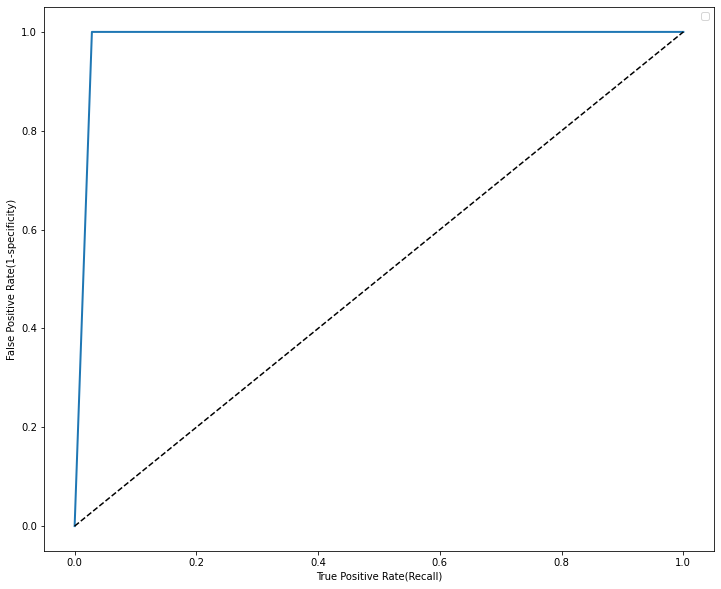

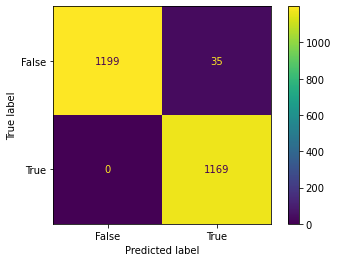

In [58]:

Precision = metrics.precision_score(y_test,ypred)
Sensitivity_recall = metrics.recall_score(y_test,ypred)
Specificity = metrics.recall_score(y_test,ypred, pos_label=0)
F1_score = metrics.f1_score(y_test,ypred)
print({"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

fpr, tpr, thresholds = roc_curve(y_test,ypred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal # Add axis labels and grid
    #plt.figure(figsize=figure)
    plt.xlabel('True Positive Rate(Recall)')
    plt.ylabel("False Positive Rate(1-specificity)")
    plt.legend()
    
plot_roc_curve(fpr, tpr)

confusion_matrix = metrics.confusion_matrix(y_test,ypred )

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# create a decision tree classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
dst= DecisionTreeClassifier(max_depth=5, random_state=42)
# train the classifier on the training data
dst.fit(X_train, y_train)

# predict the labels for the test data
dst_predict= dst.predict(X_test)
# evaluate the performance of the classifier
acc_dst = accuracy_score(y_test, dst_predict)
acc = accuracy_score(y_test, dst_predict)
print("ACCURACY of descision tree : ",acc)


ACCURACY of descision tree :  0.9800249687890137


# confusion matrix for DTC

In [65]:
fpr,tpr,thershold =metrics.roc_curve(y_test, dst_predict, pos_label=2)
con =confusion_matrix(y_test, dst_predict)
print(con)
print("accuracy score of descison tree ",accuracy_score(y_test,dst_predict))
report = classification_report(y_test, dst_predict)
print(report)

C:\Users\ELmasry\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


TypeError: 'numpy.ndarray' object is not callable

# ROC for DTC

No handles with labels found to put in legend.


{'Precision': 0.9714045416316233, 'Sensitivity_recall': 0.9880239520958084, 'Specificity': 0.9724473257698542, 'F1_score': 0.9796437659033079}


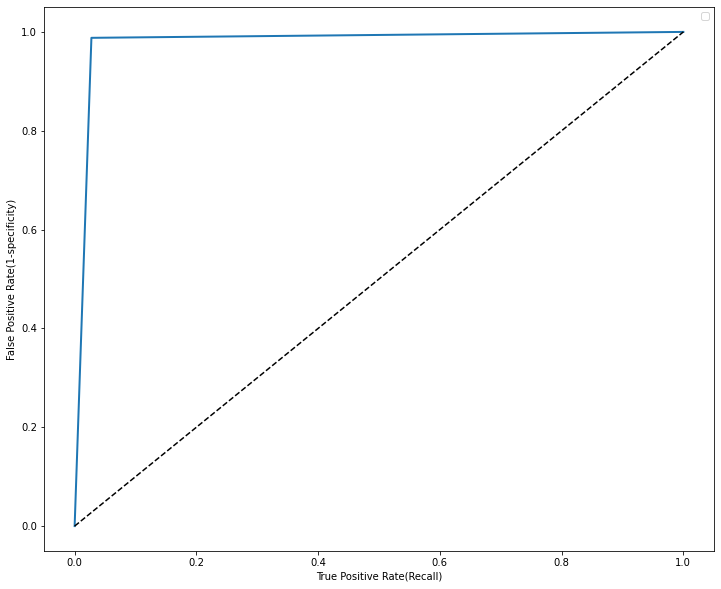

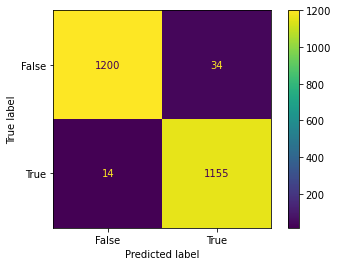

In [66]:

Precision = metrics.precision_score(y_test,dst_predict)
Sensitivity_recall = metrics.recall_score(y_test,dst_predict)
Specificity = metrics.recall_score(y_test,dst_predict, pos_label=0)
F1_score = metrics.f1_score(y_test,dst_predict)
print({"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

fpr, tpr, thresholds = roc_curve(y_test,dst_predict)
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal # Add axis labels and grid
    #plt.figure(figsize=figure)
    plt.xlabel('True Positive Rate(Recall)')
    plt.ylabel("False Positive Rate(1-specificity)")
    plt.legend()
    
plot_roc_curve(fpr, tpr)

confusion_matrix = metrics.confusion_matrix(y_test,dst_predict )

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# create a random forest classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=80, random_state=42,max_depth=(3))

# train the classifier on the training data
rf.fit(X_train, y_train)

# predict the labels for the test data
rf_pred = rf.predict(X_test)

# evaluate the performance of the classifier
acc_rf = accuracy_score(y_test, rf_pred)
print("THE ACCURACY of random forest ",acc_rf)


THE ACCURACY of random forest  0.9870994590095714


# confusion matrix

In [68]:
fpr,tpr,thershold =metrics.roc_curve(y_test,rf_pred, pos_label=2)
print("confusion matrix of the random forest ",confusion_matrix(y_test, rf_pred))
print("accuracy score ",accuracy_score(y_test,rf_pred))
report = classification_report(y_test, rf_pred)
print(report)

C:\Users\ELmasry\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


TypeError: 'numpy.ndarray' object is not callable

# ROC for Random forest

No handles with labels found to put in legend.


{'Precision': 0.9973776223776224, 'Sensitivity_recall': 0.9760479041916168, 'Specificity': 0.9975688816855753, 'F1_score': 0.9865974924340684}


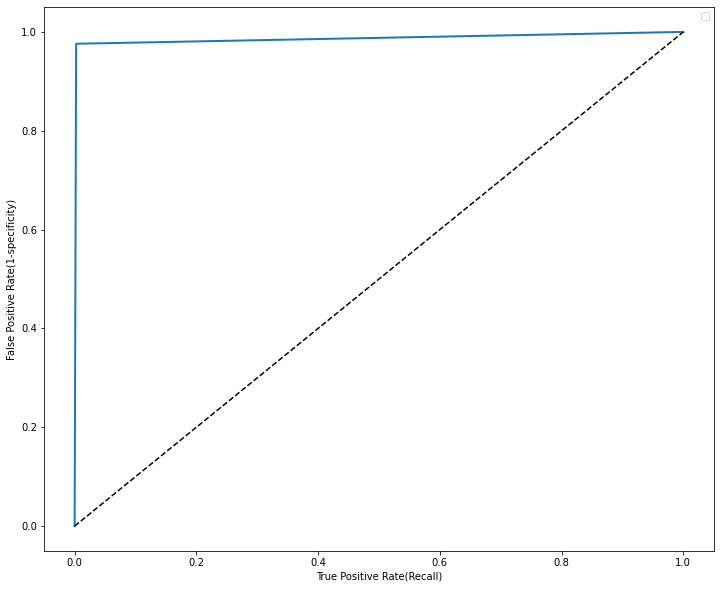

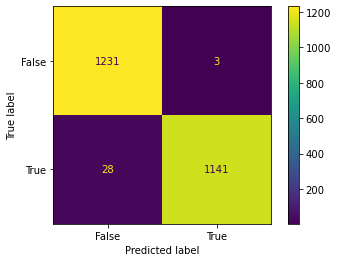

In [69]:

Precision = metrics.precision_score(y_test,rf_pred)
Sensitivity_recall = metrics.recall_score(y_test,rf_pred)
Specificity = metrics.recall_score(y_test,rf_pred, pos_label=0)
F1_score = metrics.f1_score(y_test,rf_pred)
print({"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

fpr, tpr, thresholds = roc_curve(y_test,rf_pred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal # Add axis labels and grid
    #plt.figure(figsize=figure)
    plt.xlabel('True Positive Rate(Recall)')
    plt.ylabel("False Positive Rate(1-specificity)")
    plt.legend()
    
plot_roc_curve(fpr, tpr)

confusion_matrix = metrics.confusion_matrix(y_test,rf_pred )

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()